<a href="https://colab.research.google.com/github/samruddhi-08/Suicide_rate__in_India___DSBDA/blob/main/DSBDA_MINI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTING LIBRARIES
import pandas as pd  #data analysis
import numpy as np   #multi-dimensional arrays
import matplotlib.pyplot as plt   #embedding plots
import seaborn as sns    #data visualisation lib to plot graphs
import warnings 
import os    #directory manipulation

warnings.filterwarnings('ignore')   #ignores warnings

In [ ]:
data=pd.read_csv('Suicides in India 2001-2012.csv')

In [ ]:
data

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


In [ ]:
#SIZE OF DATA:
print("Available data size (rows,columns):")
data.shape   #The shape of an array is the number of elements in each dimension

Available data size (rows,columns):


(237519, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [ ]:
data.corr()

,Year,Total
Year,1.000000,0.011143
Total,0.011143,1.000000


In [ ]:
data.sample(10)  

,State,Year,Type_code,Type,Gender,Age_group,Total
61723,Delhi (Ut),2002,Professional_Profile,Professional Activity,Male,0-14,0
157282,Mizoram,2004,Causes,Bankruptcy or Sudden change in Economic,Female,45-59,0
108114,Jharkhand,2012,Professional_Profile,Others (Please Specify),Female,60+,0
123236,Lakshadweep,2003,Means_adopted,By Overdose of sleeping pills,Male,45-59,0
96675,Jammu & Kashmir,2004,Means_adopted,By Fire-Arms,Female,45-59,0
110135,Karnataka,2004,Means_adopted,By Jumping from (Building),Male,0-14,0
43035,Chhattisgarh,2005,Education_Status,Primary,Male,0-100+,848
107766,Jharkhand,2012,Causes,Dowry Dispute,Male,45-59,0
45982,Chhattisgarh,2010,Means_adopted,By Machine,Female,45-59,0
215080,Tripura,2009,Causes,Physical Abuse (Rape/Incest Etc.),Male,30-44,0


State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64


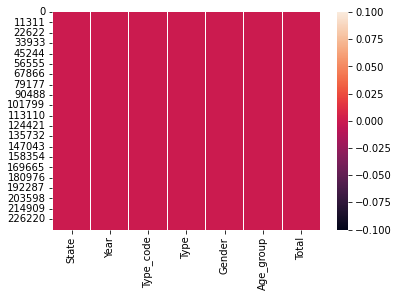

In [ ]:
print(data.isna().sum())    #count NaN values in data frame

sns.heatmap(data.isna())    #Plot rectangular data as a color-encoded matrix

In [ ]:
# Delete rows with null data and reset the index
data = data.dropna()
data = data.reset_index(drop=True)
data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64


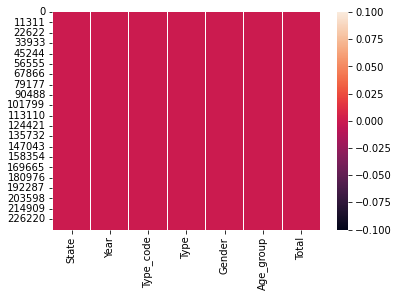

In [ ]:
print(data.isna().sum())    #count NaN values in data frame

sns.heatmap(data.isna())    #Plot rectangular data as a color-encoded matrix

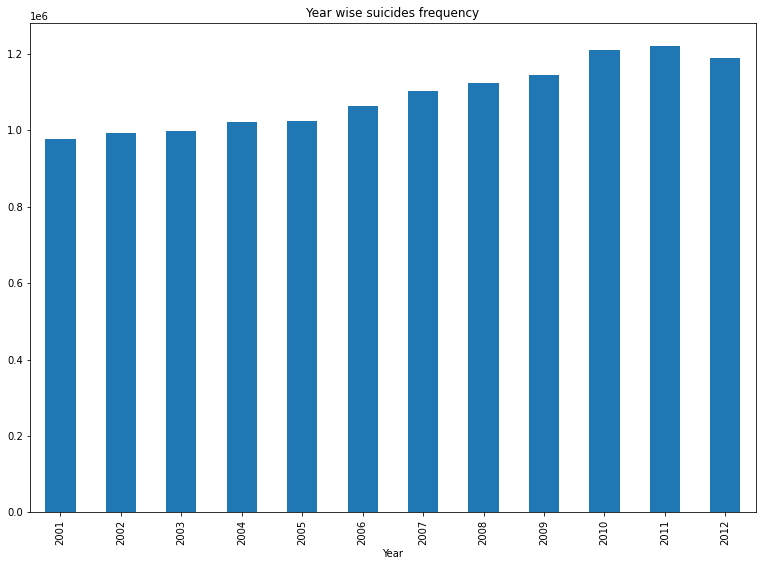

In [ ]:
data.groupby('Year').sum()['Total'].plot(kind='bar',figsize=(13,9),title ="Year wise suicides frequency");
# summing up the amounts year wise

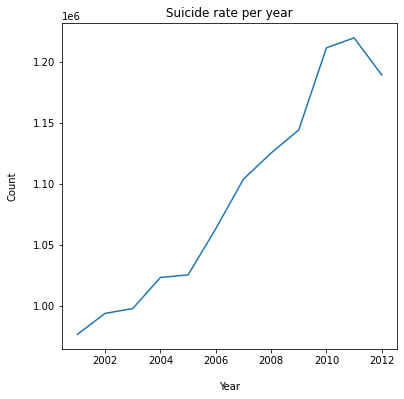

In [ ]:
#LINE CHART
year = data.groupby('Year').sum()['Total'].plot(kind='line', figsize=(6,6), title = 'Suicide rate per year');
year.set_xlabel('\nYear')
year.set_ylabel('Count\n')
sns.set_style('whitegrid');

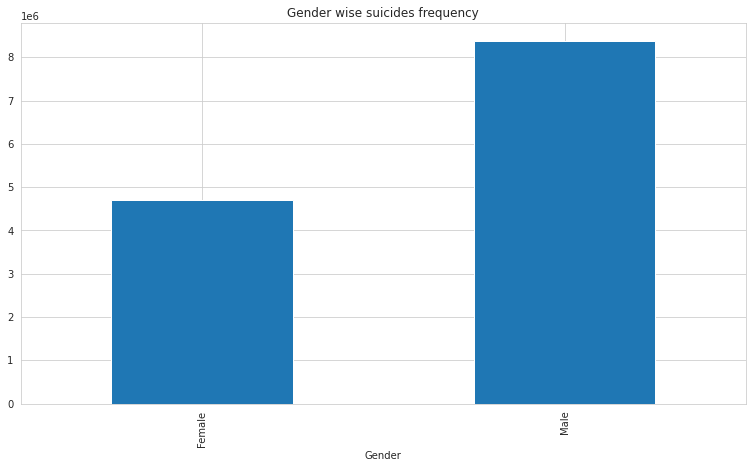

In [ ]:
data.groupby('Gender').sum()['Total'].plot(kind="bar",figsize=(13,7),title ="Gender wise suicides frequency");

In [ ]:
data.Type_code.unique()  #The unique() function is used to get unique values of Series object. Uniques are returned in order of appearance

array(['Causes', 'Education_Status', 'Means_adopted',
       'Professional_Profile', 'Social_Status'], dtype=object)

In [ ]:
#Education_Status
edudata=data[data['Type_code']=='Education_Status']
#Causes
causedata=data[data['Type_code']=='Causes']
#Means_adopted
meansdata=data[data['Type_code']=='Means_adopted']
#Professional_Profile
profdata=data[data['Type_code']=='Professional_Profile']
#Social_Status
socialdata=data[data['Type_code']=='Social_Status']

In [ ]:
edudata=edudata[['Type','Gender','Total']]
eduSort=edudata.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)

causedata=causedata[['Type','Gender','Total']]
causeSort=causedata.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)

meansdata=meansdata[['Type','Gender','Total']]
meansSort=meansdata.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)

profdata=profdata[['Type','Gender','Total']]
profSort=profdata.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)

socialdata=socialdata[['Type','Gender','Total']]
socialSort=socialdata.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='Type',y='Total',hue='Gender',data=eduSort,palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.title('[Educational background] vs [Total suicides] vs [Gender]')
plt.tight_layout()

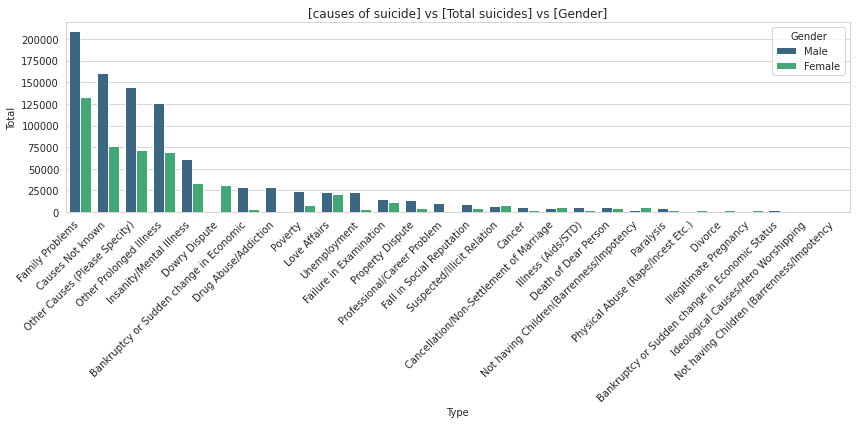

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='Type',y='Total',hue='Gender',data=causeSort,palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.title('[causes of suicide] vs [Total suicides] vs [Gender]')
plt.tight_layout()

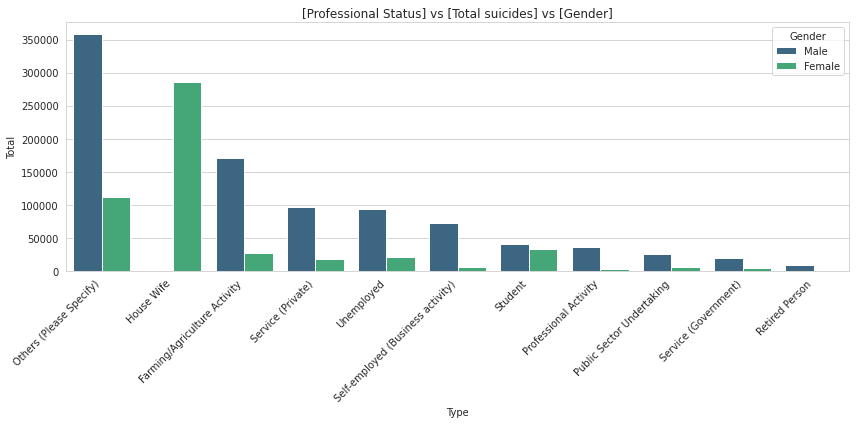

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='Type',y='Total',hue='Gender',data=profSort,palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.title('[Professional Status] vs [Total suicides] vs [Gender]')
plt.tight_layout()

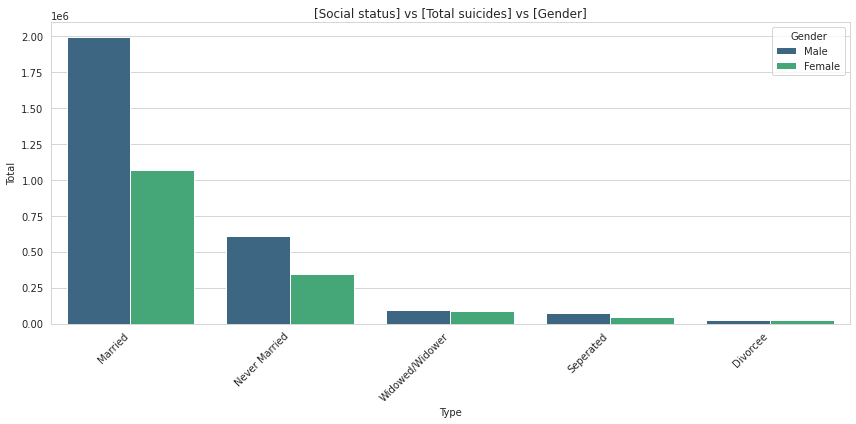

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='Type',y='Total',hue='Gender',data=socialSort,palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.title('[Social status] vs [Total suicides] vs [Gender]')
plt.tight_layout()

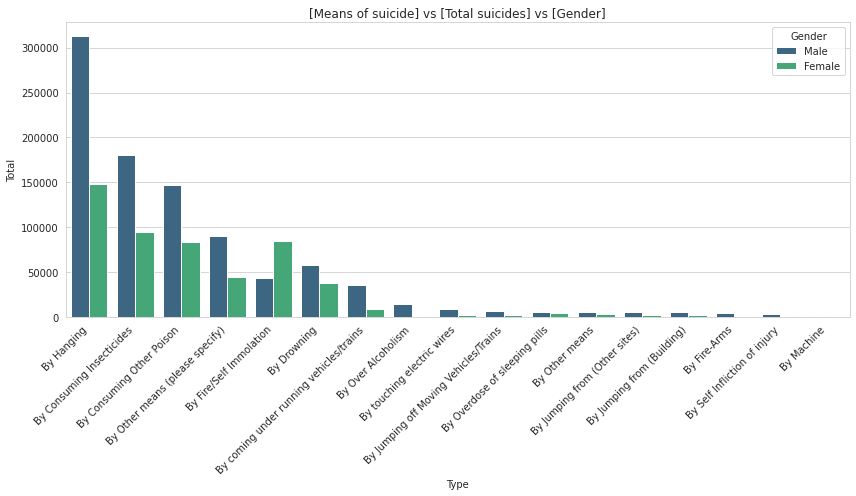

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x='Type',y='Total',hue='Gender',data=meansSort,palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.title('[Means of suicide] vs [Total suicides] vs [Gender]')
plt.tight_layout()

Text(0.5, 0, 'Total number of suicides')

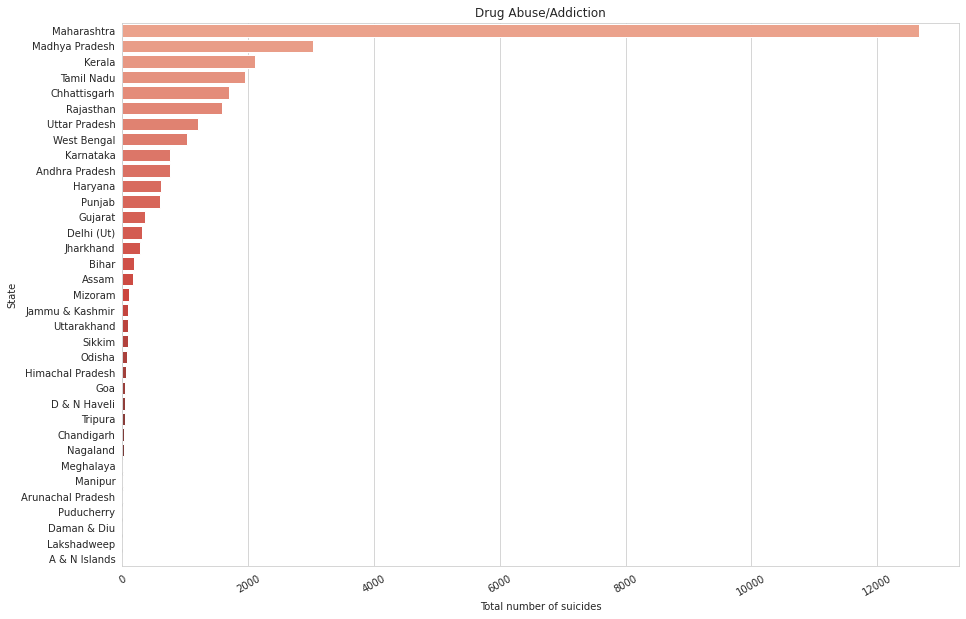

In [ ]:
data1 = data.loc[(data.Type == 'Drug Abuse/Addiction')].groupby(['State'])['Total'].sum().reset_index().sort_values('Total',ascending=False).head(60)
data1.set_index(['State'])
data1=data1.set_index(['State'])
plt.subplots(figsize=(15,10))
g = sns.barplot(x='Total',y=data1.index,data=data1,palette="Reds_d",).set_title('Drug Abuse/Addiction')
plt.xticks(rotation=30)
plt.xlabel('Total number of suicides')

In [ ]:
causes=data[data['Type_code']=='Causes']
causeGrp=causes.groupby(['State','Age_group'],as_index=False).sum()
causeGprpvt=causeGrp.pivot(index='Age_group',columns='State',values='Total')

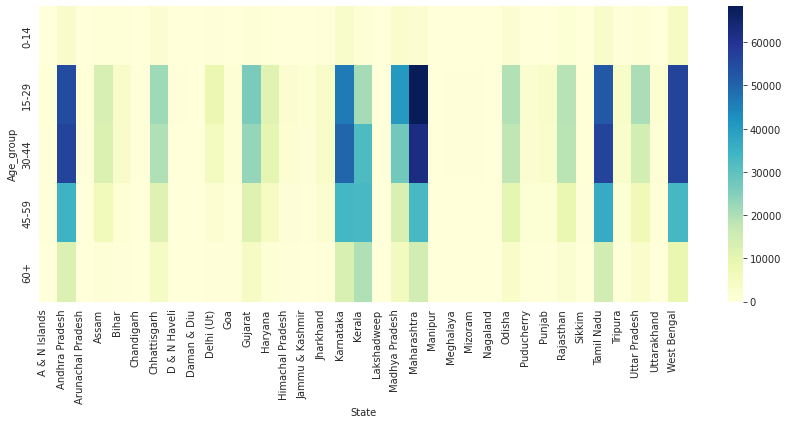

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=45,ha='right')
sns.heatmap(causeGprpvt,cmap="YlGnBu")
plt.tight_layout()

In [ ]:
causesType=data[data['Type_code']=='Causes']
causeTypeGrp=causesType.groupby(['State','Type'],as_index=False).sum()
causeTypeGprpvt=causeTypeGrp.pivot(index='State',columns='Type',values='Total')

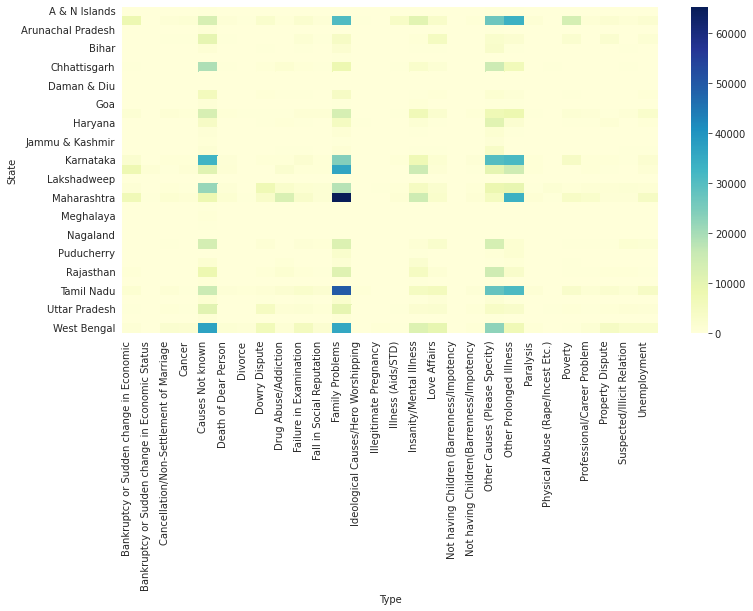

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=45,ha='right')
sns.heatmap(causeTypeGprpvt,cmap="YlGnBu")